In [25]:
# Necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Reading the data
df = pd.read_csv("./../../Dataset/data-week-2/lang_iden_combined.csv")

In [10]:
# Drop useless column
df.drop(columns = ["Unnamed: 0"], axis = 1, inplace = True)

In [11]:
# Encoding the langauge label for training  : converting classes to label, like 0, 1, 2...
from sklearn.preprocessing import LabelEncoder   # Class for labeling the data

encoder = LabelEncoder()  # Create object
df["language_id"] = encoder.fit_transform(df["lang"]) # Give labels


In [12]:
# Train Test Split
X = df["text"]
Y = df["language_id"]


In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 42)

In [14]:
# Importing CountVectorizer : To convert the sentence into vector (numeric)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()  # Create object of CountVectorizer class
x_train = vectorizer.fit_transform(x_train)  # Convert x_train into numeric

In [16]:
# Convert x_test into vectorize format
x_test = vectorizer.transform(x_test)

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Import for building Decision Tree Model

In [19]:
# give critereia
dt_model = DecisionTreeClassifier(criterion = "entropy", random_state = 42)

In [20]:
# Train the model
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [26]:
# Functions for evaluation 
import seaborn as sns
from  sklearn.metrics import confusion_matrix

def eval_confusion_matrix(model, x, y):
    ''' 
    Function for confusion matrix
    '''  
    
    # Predicting the values
    y_pred = model.predict(x)
    
    # Drawing heatmap
    sns.heatmap(confusion_matrix(y, y_pred), annot = True, fmt = ".2f", cmap = "Blues", xticklabels = encoder.inverse_transform(y_test.unique()), yticklabels = encoder.inverse_transform(y_test.unique()), cbar = True)
    
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()  
    

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, x, y):
    '''
        Function to evaluate the model
    '''

    # Accuracy score
    y_pred = model.predict(x)
    accuracy = accuracy_score(y, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Precision
    precision = precision_score(y, y_pred, average='weighted')
    print(f"Precision: {precision * 100:.2f}%")

    # Recall
    recall = recall_score(y, y_pred, average='weighted')
    print(f"Recall: {recall * 100:.2f}%")

    # F1-Score
    f1 = f1_score(y, y_pred, average='weighted')
    print(f"F1-Score: {f1 * 100:.2f}%")

Evaluating the model in test data
Accuracy: 81.50%
Precision: 89.86%
Recall: 81.50%
F1-Score: 82.94%


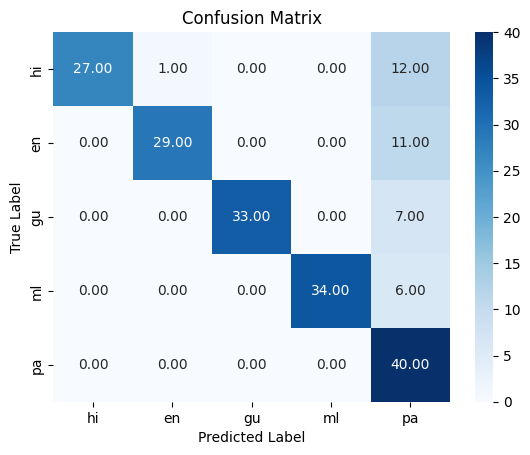

In [27]:
# Evaluation the model

print("Evaluating the model in test data")

evaluate_model(dt_model, x_test, y_test)
eval_confusion_matrix(dt_model, x_test, y_test)

### Predicting The value

In [38]:
# Example new text to predict
new_text = ["ക്ഷമിക്കണം"]

# Vectorize the new text using the same vectorizer
new_text_vectorized = vectorizer.transform(new_text)

# Predict the class of the new text
predicted_class = dt_model.predict(new_text_vectorized)

# Output the predicted class (0 or 1)
print(f"Predicted class for the new text: {predicted_class[0]}")

decoded_label = encoder.inverse_transform([predicted_class[0]])
print("Langauge is:", decoded_label[0])

Predicted class for the new text: 4
Langauge is: pa


C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\sklearn\tree\_export.py:670: UserWarning: Glyph 2324 (\N{DEVANAGARI LETTER AU}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\sklearn\tree\_export.py:670: UserWarning: Matplotlib currently does not support Devanagari natively.
  ann.update_bbox_position_size(renderer)
C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\sklearn\tree\_export.py:670: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\sklearn\tree\_export.py:670: UserWarning: Glyph 2565 (\N{GURMUKHI LETTER A}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\sklearn\tree\_export.py:670: UserWarning: 

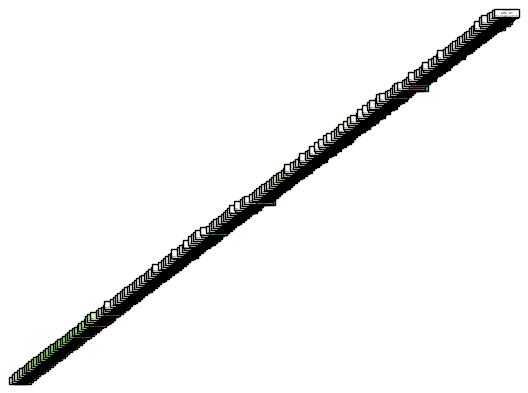

In [50]:
plot_tree(dt_model, feature_names = vectorizer.get_feature_names_out(), class_names = encoder.classes_, filled = True)
plt.show()

0         But many have tried to supply missing details.
1      Jaish-e-Mohammed (JeM) control rooms were also...
2             He declined to speak further on the issue.
3      In Haryana, there are over 1.83 crore voters, ...
4             Therefore, this has to be done cautiously.
                             ...                        
995                      ਅਤੇ ਅਸੀਂ ਤੁਹਾਡਾ ਸਵਾਗਤ ਕਰਦੇ ਹਾਂ!
996    ਆਪਣੇ ਬਚਨ, ਬਾਈਬਲ ਵਿਚ, ਯਹੋਵਾਹ ਨੇ ਸਦੀਆਂ ਦੌਰਾਨ ਅਪੂ...
997             ਇਸ ਟੀਕੇ ਦੀਆਂ ਦੋ ਖੁਰਾਕਾਂ ਦਿੱਤੀਆਂ ਜਾਣਗੀਆਂ।
998    ਯਿਸੂ ਨੇ ਕਿਹਾ: “ਮੈਂ ਹੀ ਹਾਂ ਜਿਸ ਰਾਹੀਂ ਮਰੇ ਹੋਇਆਂ ...
999               ਪਰ ਦੋਸਤ ਦੀ ਚੋਣ ਬਹੁਤ ਸੋਚ ਸਮਝ ਕੇ ਹੀ ਕਰੋ।
Name: text, Length: 1000, dtype: object